# Data Preprocessing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('')
#df

<ipython-input-3-89f65fdbc3e5>:4: DtypeWarning: Columns (66,78,92,103,362,363,415,471,472,474,475,477,479,483,484,487,489,490,491,492,493,494,495,496,497,498,499,500,501,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/CEE 4803 Final Project/Datasets/FDOT_data.csv')


In [ ]:
# pulling the wanted columns

predictors = ['CYCLE', 'NEWYR', 'DEFREAS', 'ESALS', 'PAVEMENT TYPE',
              'MAXSPEED', 'SURFTYPE', 'YR', 'SURF2023', 'FCLASS', 'FC',
              'DEFAGE', 'DEFYR', 'FIRSTYRCRK65']
identifiers = ['RDWYID','RDWY', 'BMP', 'EMP', 'CONTYDOT', 'LANES', 'LEN', 'LM', 'DISTRICT']
df_typeyr = df.loc[:, 'TYPE1976':'TYPE2023']
df_crkratings = df.loc[:, 'CRK1976':'CRK2023']

df_filtered = pd.concat([df[identifiers + predictors], df_typeyr, df_crkratings], axis=1)


In [ ]:
df_filtered
df_filtered.to_csv('filtered_data.csv', index=False)
df_filtered.shape

(9304, 119)

In [ ]:
# processing the climate files, tried to do a for loop thing instead of repeating it all like this but couldn't figure it out
contydot = pd.read_csv('')
contydot.rename(columns={'CONTYNAM': 'County'}, inplace=True)

precipitation = pd.read_csv('')
temp_avg = pd.read_csv('')
temp_min = pd.read_csv('')
temp_max = pd.read_csv('')
#climate_data = ['precipitation', 'temp_avg', 'temp_min', 'temp_max']

precipitation = pd.concat([precipitation['County'], precipitation.loc[:, '1976':'2023']], axis=1)
temp_avg = pd.concat([temp_avg['County'], temp_avg.loc[:, '1976':'2023']], axis=1)
temp_min = pd.concat([temp_min['County'], temp_min.loc[:, '1976':'2023']], axis=1)
temp_max = pd.concat([temp_max['County'], temp_max.loc[:, '1976':'2023']], axis=1)

precipitation.columns = ['County'] + ['PREC' + str(year) for year in range(1976, 2023 + 1)]
temp_avg.columns = ['County'] + ['AVGTEM' + str(year) for year in range(1976, 2023 + 1)]
temp_min.columns = ['County'] + ['MINTEM' + str(year) for year in range(1976, 2023 + 1)]
temp_max.columns = ['County'] + ['MAXTEM' + str(year) for year in range(1976, 2023 + 1)]

precipitation = pd.merge(contydot[['CONTYDOT', 'County']], precipitation, on='County', how='right')
temp_avg = pd.merge(contydot[['CONTYDOT', 'County']], temp_avg, on='County', how='right')
temp_min = pd.merge(contydot[['CONTYDOT', 'County']], temp_min, on='County', how='right')
temp_max = pd.merge(contydot[['CONTYDOT', 'County']], temp_max, on='County', how='right')

merged_climate = pd.concat([precipitation, temp_avg, temp_min, temp_max], axis=1)
merged_climate = merged_climate.loc[:, ~merged_climate.columns.duplicated()]
merged_climate.shape

(67, 194)

In [ ]:
# merging climate data to road segment data based on CONTYDOT
df_climate = pd.merge(df_filtered, merged_climate, on='CONTYDOT', how='left')
df_climate.to_csv('finalcombineddata.csv', index=False)
df_climate.shape

(9304, 312)

# Trying to find previous cycles - did not work

In [ ]:
# trying to extract more cycles other than the current one
# If we start at the year before the first year of a new cycle and go backwards, the scores should be increasing since we are going back in time.
# If a score drops by some threshold we define, we can assume that the last year before it drops is the start of that cycle. This is better than just
# checking if a score rises at all, since it is not likely that the surveyor will "accidentally" make a score mistake by that threshold

# Just using threshold of 3 for now

# ULTIMATELY DID NOT WORK BECAUSE 1984 AND 1985 COLUMNS ARE COMPLETELY MISSING DATA!
# ULTIMATELY DID NOT WORK BECAUSE 1984 AND 1985 COLUMNS ARE COMPLETELY MISSING DATA!
# ULTIMATELY DID NOT WORK BECAUSE 1984 AND 1985 COLUMNS ARE COMPLETELY MISSING DATA!

df_climate.loc[df_climate['NEWYR'] == '.', 'NEWYR'] = '2023'
df_prev_cycles = df_climate.copy()

threshold = 0.1

for index, row in df_prev_cycles.head(10).iterrows():
  start_year = 1976
  end_year = int(row['NEWYR'])
  cycle_columns = [f'CRK{year}' for year in range(start_year, end_year)]

  columns_to_check = df_prev_cycles.loc[index, cycle_columns]

  df_prev_cycles['NEWYRPREVCYC'] = None

  for i in range(len(columns_to_check) - 1, 0, -1):
    if pd.notna(columns_to_check[i - 1]) and isinstance(columns_to_check[i - 1], int):
      # Check if the value is equal to 10
        if columns_to_check[i] == 10:
          df_prev_cycles.at[index, 'NEWYRPREVCYC'] = 'test'
          break  # Stop the loop when a value equal to 10 is found
  # for i in range(len(columns_to_check) - 1, 0, -1):
  #   if (pd.notna(columns_to_check[i - 1]) and isinstance(columns_to_check[i - 1], int)) and columns_to_check[i] - columns_to_check[i - 1] >= threshold:
  #     df_prev_cycles.at[index, 'NEWYRPREVCYC'] = i
  #     break



In [ ]:
#df_prev_cycles.loc[:,'CRK1989':'CRK1996']
# df_prev_cycles['NEWYRPREVCYC']
cycle_columns

# Converting rows to cycles

In [ ]:
df_climate = pd.read_csv('')


In [ ]:
#df_crk = df_climate.loc[:, 'CRK1976':'CRK2023']
import warnings
warnings.filterwarnings("ignore", category=pd.errors.PerformanceWarning)

column_types = ['CRK', 'PREC', 'MAXTEM', 'MINTEM', 'AVGTEM', 'TYPE']

for column_type in column_types:
    for number in range(0, 49):
        number_str = str(number)
        column_name = f'{column_type}t+{number}'
        df_climate[column_name] = None

df_climate.loc[df_climate['NEWYR'] == '.', 'NEWYR'] = '2023'

end_year = 2023
# converting the year base to the most recent cycle
for index, row in df_climate.iterrows():

  start_year = int(row['NEWYR'])

  type_columns = [f'TYPE{year}' for year in range(start_year, end_year + 1)]
  crk_columns = [f'CRK{year}' for year in range(start_year, end_year + 1)]
  prec_columns = [f'PREC{year}' for year in range(start_year, end_year + 1)]
  avgtem_columns = [f'AVGTEM{year}' for year in range(start_year, end_year + 1)]
  mintem_columns = [f'MINTEM{year}' for year in range(start_year, end_year + 1)]
  maxtem_columns = [f'MAXTEM{year}' for year in range(start_year, end_year + 1)]

  exclude_prefixes = ['CRK', 'PREC', 'MAXTEM', 'MINTEM', 'AVGTEM', 'TYPE']
  non_crk_columns = [col for col in df_climate.columns if not any(col.startswith(prefix) for prefix in exclude_prefixes)]

  updated_columns = non_crk_columns + type_columns + crk_columns + prec_columns + avgtem_columns + mintem_columns + maxtem_columns
  df_climate.loc[index] = row[updated_columns]

# moving the recent cycles to new CRKt+x columns
  for i, col in enumerate(type_columns):
    t_plus_col = f'TYPEt+{i}'
    df_climate.loc[index, t_plus_col] = row[col]

  for i, col in enumerate(crk_columns):
    t_plus_col = f'CRKt+{i}'
    df_climate.loc[index, t_plus_col] = row[col]

  for i, col in enumerate(prec_columns):
    t_plus_col = f'PRECt+{i}'
    df_climate.loc[index, t_plus_col] = row[col]

  for i, col in enumerate(avgtem_columns):
    t_plus_col = f'AVGTEMt+{i}'
    df_climate.loc[index, t_plus_col] = row[col]

  for i, col in enumerate(mintem_columns):
    t_plus_col = f'MINTEMt+{i}'
    df_climate.loc[index, t_plus_col] = row[col]

  for i, col in enumerate(maxtem_columns):
    t_plus_col = f'MAXTEMt+{i}'
    df_climate.loc[index, t_plus_col] = row[col]

In [ ]:
df_climate.to_csv('RAWuncleanedcycledata.csv', index=False)


# Data Cleaning

In [ ]:
df_cycle = pd.read_csv('')

<ipython-input-4-b7375f7f7ffa>:1: DtypeWarning: Columns (25,26,27,28,29,30,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,72,73,74,75,76,77,78,81,354,355,356,357,358,359,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596) have mixed types. Specify dtype option on import or set low_memory=False.
  df_cycle = pd.read_csv('/content/drive/MyDrive/CEE 4803 Final Project/Datasets/final datasets/RAWuncleanedcycledata.csv')


In [ ]:
print('Number of cycles before filtering', len(df_cycle))

crkt_columns = [col for col in df_cycle.columns if col.startswith('CRKt+')]
df_cycle = df_cycle[~df_cycle[crkt_columns].isin(['.']).any(axis=1)]
print('Number of cycles after removing cycles with . values', len(df_cycle))

columns_to_check = df_cycle.loc[:, 'CRKt+0':'CRKt+48']
columns_to_check = columns_to_check.fillna(0)
columns_to_check = columns_to_check.astype(float)

def is_descending(row):
  non_blank_values = row.dropna().tolist()
  return all(non_blank_values[i] >= non_blank_values[i+1] for i in range(len(non_blank_values) - 1))
is_descending_series = columns_to_check.apply(is_descending, axis=1)
df_cycle = df_cycle[is_descending_series]
print('Number of cycles after removing cycles that had increasing scores', len(df_cycle))

predictor_columns = ['CYCLE', 'MAXSPEED', 'ESALS']
df_cycle = df_cycle.dropna(subset=predictor_columns)
df_cycle = df_cycle[df_cycle[predictor_columns].ne(0).all(axis=1)]
df_cycle = df_cycle[df_cycle[predictor_columns].ne('.').all(axis=1)]
print('Number of cycles after removing cycles with NaNs or 0s in predictor columns', len(df_cycle))

end_year = 2023
for index, row in df_cycle.iterrows():
  start_year = int(row['NEWYR'])
  crk_columns = [f'CRKt+{year}' for year in range(start_year, end_year + 1)]

  if len(crk_columns) < 6:
    df_cycle = df_cycle.drop(index, axis=0)
print('Number of cycles after removing cycles less than 6 years old (missing data for 2019-2023)', len(df_cycle))

unclean_length = len(df)
clean_length = len(df_cycle)
percentage_retained = (clean_length / unclean_length) * 100

print(f'Before the selection criteria were applied, there were {unclean_length} rows.')
print(f'After the selection criteria were applied, there are {clean_length} rows.')
print(f'That means that we retained {percentage_retained:.2f}% of the data.')

Number of cycles before filtering 9304
Number of cycles after removing cycles with . values 7962
Number of cycles after removing cycles that had increasing scores 7662
Number of cycles after removing cycles with NaNs or 0s in predictor columns 7555
Number of cycles after removing cycles less than 6 years old (missing data for 2019-2023) 5871
Before the selection criteria were applied, there were 9304 rows.
After the selection criteria were applied, there are 5871 rows.
That means that we retained 63.10% of the data.


In [ ]:
end_year = 2023
max_length = df_cycle.apply(lambda row: len([f'CRKt+{year}' for year in range(int(row['NEWYR']), end_year + 1)]), axis=1).max()
print("Max length of crk_columns:", max_length)

end_year = 2023
min_length = df_cycle.apply(lambda row: len([f'CRKt+{year}' for year in range(int(row['NEWYR']), end_year + 1)]), axis=1).min()
print("Min length of crk_columns:", min_length)

Max length of crk_columns: 38
Min length of crk_columns: 6


In [ ]:
column_types = ['CRK', 'PREC', 'MAXTEM', 'MINTEM', 'AVGTEM', 'TYPE']

for prefix in column_types:
  #df_cycle = df_cycle.drop(columns=[f'{prefix}{year}' for year in range(1976, 2024)])
  df_cycle = df_cycle.drop(columns=[f'{prefix}t+{number}' for number in range(38, 48)])

df_cycle.to_csv('CLEANcycledata.csv', index=False)

# Feature Engineering

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# Function to calculate the moving average deterioration rate
def moving_Average(row, window_size=3):
    # Get only the CRK ratings for the row, drop NaNs
    ratings = row.dropna()
    if len(ratings) < window_size:  # Not enough data to calculate a moving average
        return np.nan

    # Calculate the moving average
    moving_average = ratings.rolling(window=window_size).mean().dropna()

    # Calculate the rate of deterioration as the difference between the first and last moving average
    deterioration_rate = (moving_average.iloc[-1] - moving_average.iloc[0]) / (len(moving_average) - 1)

    # Return the absolute value of the deterioration rate
    return abs(deterioration_rate)

# Load the dataset
cycle_data = pd.read_csv('')

# Define crack_data_numeric_new by selecting columns starting with 'CRKt' and converting to numeric
crack_columns_new = [col for col in cycle_data.columns if col.startswith('CRKt')]
crack_data_new = cycle_data[crack_columns_new]
crack_data_numeric_new = crack_data_new.apply(pd.to_numeric, errors='coerce')

# Apply the moving_Average function
deterioration_rates_moving_average_new = crack_data_numeric_new.apply(moving_Average, axis=1)

# Append the deterioration rates as a new column to the original dataframe
cycle_data['Deterioration_Rate_Moving_Avg'] = deterioration_rates_moving_average_new

# Drop rows where the deterioration rate is NaN or zero
cycle_data_cleaned = cycle_data.dropna(subset=['Deterioration_Rate_Moving_Avg'])
cycle_data_cleaned = cycle_data_cleaned[cycle_data_cleaned['Deterioration_Rate_Moving_Avg'] != 0]

new_column_order = ['Deterioration_Rate_Moving_Avg'] + [col for col in cycle_data_cleaned.columns if col not in ['Deterioration_Rate_Moving_Avg']]
cycle_data_cleaned = cycle_data_cleaned[new_column_order]

# Save the cleaned dataframe to a new CSV file
cycle_data_cleaned.to_csv('deterioration_rates.csv', index=False)

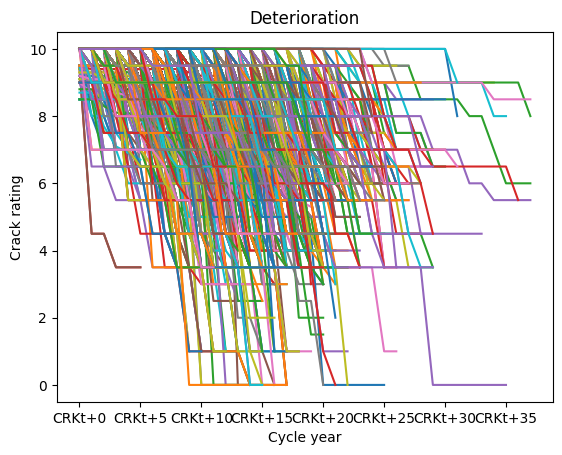

In [ ]:
import matplotlib.pyplot as plt

df_transposed = cycle_data_cleaned.loc[:, 'CRKt+0':'CRKt+37'].T

# Plot the transposed DataFrame
df_transposed.plot(legend=False)  # Set legend=False to remove the legend

# Set labels and title
plt.xlabel('Cycle year')
plt.ylabel('Crack rating')
plt.title('Deterioration')

# Show the plot
plt.show()

# Pilot Study Selection

In [ ]:
# Pilot Study will consist of the cycles with the 5 highest and 5 lowest deterioration rates
# Sort the cleaned data by the deteriorate rate column and  put the

# Sort the DataFrame by the "deterioration_rate" column in ascending order
cycle_data_claned = df.sort_values(by='DETERIORATION_RATE')

# Select the rows with the 5 lowest deterioration rates
lowest_rates = df_sorted.head(5)

# Select the rows with the 5 highest deterioration rates
highest_rates = df_sorted.tail(5)

# Concatenate the highest and lowest rate DataFrames
pilot_study = pd.concat([lowest_rates, highest_rates])

# Reset the index for the combined DataFrame
pilot_study = pilot_study.reset_index(drop=True)

# Data Splitting

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_data = pilot_study[]

In [ ]:
# Calculate the deterioration rate based on CRK ratings
# Assuming you have columns 'CYCLE' and 'CRK1976' to 'CRK2023'
# and you want to calculate deterioration rate per row based on the CRK ratings
df_climate['DETERIORATION_RATE'] = df_climate.groupby('RDWYID')['CRK2023'].diff() / df_climate.groupby('RDWYID')['CYCLE'].diff()

# Fill any missing values in the deterioration rate column with 0 or other suitable values
df_climate['DETERIORATION_RATE'].fillna(0, inplace=True)


# Fill any missing values in the deterioration rate column with 0 or other suitable values
df_climate['DETERIORATION_RATE'].fillna(0, inplace=True)

# Save the updated DataFrame to a new CSV file
df_climate.to_csv('finalcombineddata_with_deterioration_rate.csv', index=False)

# Check the shape of the updated DataFrame
print(df_climate.shape)
